In [15]:
import pandas as pd
import os
import matplotlib.pyplot as plt

# LAGTec subcorpus preparation

In [19]:
# point out to your local version of the LAGT corpus (v2.1 or higher) and save it locally or download it straight from zenodo
try:
    LAGT = pd.read_json("../data/large_files/LAGT.json")
except:
    LAGT = pd.read_json("https://zenodo.org/records/10035517/files/LAGT_v2-1.json?download=1")
    os.mkdir("../data/large_files")
    LAGT.to_json("../data/large_files/LAGT.json")

In [4]:
LAGT.head()

,filename,author,title,wordcount,author_id,doc_id,raw_date,date_avr,date_probs,date_manual,provenience,tlg_epithet,clean_string,n_sentences,lemmatized_sentences,GLAUx?
0,tlg0001.tlg001.perseus-grc2.xml,Apollonius Rhodius,Argonautica,38822,tlg0001,tlg0001.tlg001,3 B.C.,-2.5,{'-2.5': 1},-2.5,pagan,Epici/-ae,"ἀρχόμενος σέο, Φοῖβε, παλαιγενέων κλέα φωτῶν μ...",3252,"[[ἄρχω, Φοῖβος, παλαιγενής, κλέος, φώς, μιμνῄσ...",True
1,tlg0003.tlg001.perseus-grc2.xml,Thucydides,The Peloponnesian War,150118,tlg0003,tlg0003.tlg001,5 B.C.,-4.5,{'-4.5': 1},-4.5,pagan,Historici/-ae,Θουκυδίδης Ἀθηναῖος ξυνέγραψε τὸν πόλεμον τῶν...,6068,"[[Θουκυδίδης, Ἀθηναῖος, συγγράφω, πόλεμος, Πελ...",True
2,tlg0004.tlg001.perseus-grc1.xml,Diogenes Laertius,Lives of Eminent Philosophers,110763,tlg0004,tlg0004.tlg001,A.D. 3,2.5,{'2.5': 1},NaN,,Biographi,Τὸ τῆς φιλοσοφίας ἔργον ἔνιοί φασιν ἀπὸ βαρβάρ...,10245,"[[φιλοσοφία, ἔργον, ἔνιοι, φημί, βάρβαρος, ἄρχ...",False
3,tlg0005.tlg001.perseus-grc1.xml,Theocritus,Idylls,19200,tlg0005,tlg0005.tlg001,4-3 B.C.,-3.0,"{'-3.5': 0.5, '-2.5': 0.5}",NaN,,Bucolici,"̔Αδύ τι τὸ ψιθύρισμα καὶ ἁ πίτυς αἰπόλε τήνα,...",1982,"[[ἡδύς, τις, ψιθύρισμα, πίτυς, αἰπόλος, ἐκεῖνο...",True
4,tlg0005.tlg002.perseus-grc1.xml,Theocritus,Epigrams,1734,tlg0005,tlg0005.tlg002,4-3 B.C.,-3.0,"{'-3.5': 0.5, '-2.5': 0.5}",NaN,,Bucolici,τὰ ῥόδα τὰ δροσόεντα καὶ ἁ κατάπυκνος ἐκείνα ἕ...,152,"[[ῥόδον, δροσόεις, κατάπυκνος, ἐκεῖνος, ἕρπυλλ...",True


In [22]:
len(LAGT)

1277

In [20]:
LAGT.columns

Index(['filename', 'author', 'title', 'wordcount', 'author_id', 'doc_id',
       'raw_date', 'date_avr', 'date_probs', 'date_manual', 'provenience',
       'tlg_epithet', 'clean_string', 'n_sentences', 'lemmatized_sentences',
       'GLAUx?'],
      dtype='object')

In [23]:
len(LAGT[LAGT["provenience"]=="christian"])

148

In [24]:
for date in [0.5, 1.5, 2.5, 3.5, 4.5]:
    mask = ((LAGT["date_avr"] <= date) & (LAGT["provenience"]=="christian"))
    print(date,
          mask.sum(),
          LAGT[mask]["wordcount"].sum()
          )

0.5 29 151723
1.5 51 474124
2.5 104 1711991
3.5 137 3059696
4.5 148 3566823


In [25]:
# all texts before the end of the
LAGTec = LAGT[(LAGT["date_avr"] < 5) & (LAGT["provenience"]=="christian")].copy()

In [26]:
LAGTec[LAGTec["author_id"].str.startswith("tlg0031paul")]

,filename,author,title,wordcount,author_id,doc_id,raw_date,date_avr,date_probs,date_manual,provenience,tlg_epithet,clean_string,n_sentences,lemmatized_sentences,GLAUx?
390,tlg0031.tlg006.perseus-grc2.xml,Paul of Tarsus,Romans,7107,tlg0031paul,tlg0031.tlg006,A.D. 1,0.5,{'0.5': 1},0.5,christian,[],"ΠΑΥΛΟΣ δοῦλος Ἰησοῦ Χριστοῦ, κλητὸς ἀπόστολος...",490,"[[Παῦλος, δοῦλος, Ἰησοῦς, Χριστός, κλητός, ἀπό...",False
391,tlg0031.tlg007.perseus-grc2.xml,Paul of Tarsus,1 Corinthians,6814,tlg0031paul,tlg0031.tlg007,A.D. 1,0.5,{'0.5': 1},0.5,christian,[],ΠΑΥΛΟΣ κλητὸς ἀπόστολος Ἰησοῦ Χριστοῦ διὰ θελ...,544,"[[Παῦλος, κλητός, ἀπόστολος, Ἰησοῦς, Χριστός, ...",False
392,tlg0031.tlg008.perseus-grc2.xml,Paul of Tarsus,2 Corinthians,4470,tlg0031paul,tlg0031.tlg008,A.D. 1,0.5,{'0.5': 1},0.5,christian,[],ΠΑΥΛΟΣ ἀπόστολος Χριστοῦ Ἰησοῦ διὰ θελήματος ...,274,"[[Παῦλος, ἀπόστολος, Χριστός, Ἰησοῦς, θέλημα, ...",False
393,tlg0031.tlg009.perseus-grc2.xml,Paul of Tarsus,Galatians,2235,tlg0031paul,tlg0031.tlg009,A.D. 1,0.5,{'0.5': 1},0.5,christian,[],"ΠΑΥΛΟΣ ἀπόστολος, οὐκ ἀπʼ ἀνθρώπων οὐδὲ διʼ ἀ...",159,"[[Παῦλος, ἀπόστολος, ἄνθρωπος, ἄνθρωπος, Ἰησοῦ...",False
395,tlg0031.tlg011.perseus-grc2.xml,Paul of Tarsus,Philippians,1631,tlg0031paul,tlg0031.tlg011,A.D. 1,0.5,{'0.5': 1},0.5,christian,[],ΠΑΥΛΟΣ ΚΑΙ ΤΙΜΟΘΕΟΣ δοῦλοι Χριστοῦ Ἰησοῦ πᾶσι...,83,"[[Παῦλος, Τιμόθεος, δοῦλος, Χριστός, Ἰησοῦς, ἅ...",False
397,tlg0031.tlg013.perseus-grc2.xml,Paul of Tarsus,1 Thessalonians,1475,tlg0031paul,tlg0031.tlg013,A.D. 1,0.5,{'0.5': 1},0.5,christian,[],ΠΑΥΛΟΣ ΚΑΙ ΣΙΛΟΥΑΝΟΣ ΚΑΙ ΤΙΜΟΘΕΟΣ τῇ ἐκκλησίᾳ...,65,"[[Παῦλος, σιλουανος, Τιμόθεος, ἐκκλησία, Θεσσα...",False
402,tlg0031.tlg018.perseus-grc2.xml,Paul of Tarsus,Philemon,334,tlg0031paul,tlg0031.tlg018,A.D. 1,0.5,{'0.5': 1},0.5,christian,[],ΠΑΥΛΟΣ δέσμιος Χριστοῦ Ἰησοῦ καὶ Τιμόθεος ὁ ἀ...,17,"[[Παῦλος, δέσμιος, Χριστός, Ἰησοῦς, Τιμόθεος, ...",False


# Paul data extraction

In [27]:
def get_word_sentences(sentences_list, word):
    selected_sentences = [sentence for sentence in sentences_list if word in sentence]
    return selected_sentences

In [28]:
word = "Παῦλος"
LAGTec["sentences_paul"] = LAGTec["lemmatized_sentences"].apply(lambda x: get_word_sentences(x, word))

In [29]:
LAGTec["sentences_paul_N"] = LAGTec["sentences_paul"].apply(lambda x: len(x))

In [30]:

word = "ἀπόστολος"
LAGTec["sentences_apostle"] = LAGTec["lemmatized_sentences"].apply(lambda x: get_word_sentences(x, word))

In [31]:
def count_word_in_sentences(sentences_list, word):
    selected_sentences = [sentence for sentence in sentences_list if word in sentence]
    word_N = sum([sen.count(word) for sen in sentences_list])
    return word_N

word = "Παῦλος"
LAGTec["paul_N"] = LAGTec["lemmatized_sentences"].apply(lambda x: count_word_in_sentences(x, word))

In [32]:
# how many documents contain the word "Παῦλος"
len(LAGTec[LAGTec["sentences_paul_N"]>0])

82

In [33]:
LAGTec["sentences_apostle_N"] = LAGTec["sentences_apostle"].apply(lambda x: len(x))

In [34]:
len(LAGTec[LAGTec["sentences_apostle_N"]>0])

104

In [35]:
LAGTec["sentences_paul_N"].sum()

1045

In [36]:
len(LAGTec)

148

In [37]:
LAGTec["wordcount"].sum()

3566823

# Overview by century

In [50]:
LAGTec_by_date = pd.DataFrame(LAGTec.groupby("date_avr").sum(numeric_only=True))
LAGTec_by_date.reset_index(inplace=True)
LAGTec_by_date

,date_avr,wordcount,date_manual,n_sentences,GLAUx?,sentences_paul_N,paul_N,sentences_apostle_N
0,0.5,151723,14.5,10108,2,156,160,84
1,1.5,322401,32.5,41076,6,18,18,92
2,2.5,1237867,130.0,129474,11,485,497,654
3,3.5,1347705,97.5,117599,0,205,213,690
4,4.5,507127,31.5,45061,0,181,184,146


In [51]:
LAGTec_by_date["authors_N"] = LAGTec_by_date["date_avr"].apply(lambda x: len(LAGTec[LAGTec["date_avr"]==x]["author"].unique()))

LAGTec_by_date["works_N"] = LAGTec_by_date["date_avr"].apply(lambda x: (LAGTec["date_avr"]==x).sum())

LAGTec_by_date["paul_freq"] = LAGTec_by_date["paul_N"] / LAGTec_by_date["wordcount"]

LAGTec_by_date[["date_avr", "authors_N", "wordcount", "n_sentences", "paul_N", "paul_freq", "sentences_paul_N", "sentences_apostle_N"]]


,date_avr,authors_N,wordcount,n_sentences,paul_N,paul_freq,sentences_paul_N,sentences_apostle_N
0,0.5,13,151723,10108,160,0.001055,156,84
1,1.5,13,322401,41076,18,0.000056,18,92
2,2.5,4,1237867,129474,497,0.000401,485,654
3,3.5,9,1347705,117599,213,0.000158,205,690
4,4.5,10,507127,45061,184,0.000363,181,146


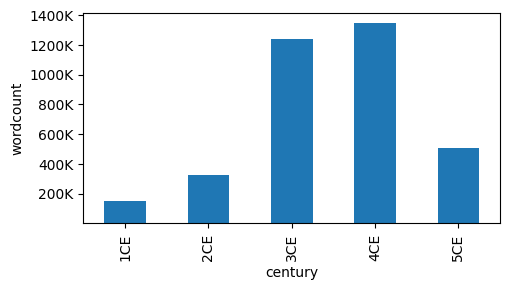

In [52]:
fig, ax = plt.subplots(figsize=[5.2,3], tight_layout=True)
LAGTec_by_date.plot.bar(x="date_avr", y="wordcount", ax=ax, legend=False)
xticklabels = ["1CE", "2CE", "3CE", "4CE", "5CE"]
ax.set_xticklabels(xticklabels)
ax.set_xlabel("century")
xticks=[n for n in range(200000, 1600000, 200000)]
ax.set_yticks(xticks)
xticklabels = [str(n) + "K" for n in range(200, 1600, 200)]
ax.set_yticklabels(xticklabels)
ax.set_ylabel("wordcount")
plt.show()

In [53]:
fig.savefig("../figures/LAGTec_wordcount_by_century")

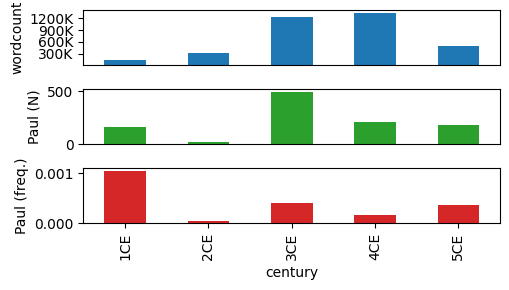

In [54]:
fig, [ax1, ax2, ax3] = plt.subplots(3,1, figsize=[5.2, 3], tight_layout=True)

# ax1
LAGTec_by_date.plot.bar(x="date_avr", y="wordcount", color="tab:blue", ax=ax1, legend=False)
ax1.set_xticks([])
ax1.set_xlabel("")

yticks=[n for n in range(300000, 1500000, 300000)]
ax1.set_yticks(yticks)
yticklabels = [str(n) + "K" for n in range(300, 1500, 300)]
ax1.set_yticklabels(yticklabels)
ax1.set_ylabel("wordcount")

# ax2
LAGTec_by_date.plot.bar(x="date_avr", y="paul_N", color="tab:green", ax=ax2, legend=False)

ax2.set_xticks([])
ax2.set_xlabel("")

ax2.set_ylabel("Paul (N)")

# ax3
LAGTec_by_date.plot.bar(x="date_avr", y="paul_freq", color="tab:red", ax=ax3, legend=False)

xticklabels = ["1CE", "2CE", "3CE", "4CE", "5CE"]
ax3.set_xticklabels(xticklabels)
ax3.set_xlabel("century")

ax3.set_ylabel("Paul (freq.)")

plt.show()

In [55]:
fig.savefig("../figures/LAGTec_wordcount+paul_by_century")

# Overview by author

In [58]:
#LAGT_metadata = pd.read_csv("../data/LAGT_metadata.csv")

In [65]:
df = LAGTec[(LAGTec["author_id"]!="tlg0031paul")]#  ["sentences_paul_N"].sum()

df_authors = df.groupby("author_id").sum(numeric_only=True)[["wordcount", "n_sentences", "paul_N","sentences_paul_N", "sentences_apostle_N"]].sort_values("sentences_paul_N", ascending=False)#
author_dict = dict(zip(LAGTec["author_id"],  LAGTec["author"]))
author_dict

{'tlg0031a': 'Gospel of Matthew',
 'tlg0031b': 'Gospel of Mark',
 'tlg0031luke': 'Luke-Acts',
 'tlg0031john': 'Johnannine literature (New Testament)',
 'tlg0031paul': 'Paul of Tarsus',
 'tlg0031pspa': 'Pauline literature',
 'tlg0031c': 'Hebrews (New Testament)',
 'tlg0031d': 'James (New Testament)',
 'tlg0031e': '1 Peter (New Testament)',
 'tlg0031f': '2 Peter (New Testament)',
 'tlg0031g': 'Jude (New Testament)',
 'tlg0031h': 'Revelation (New Testament)',
 'tlg0317': 'Acta Joannis (recensio)',
 'tlg0555': 'Clement of Alexandria',
 'tlg0563': 'Maximus of Tyre',
 'tlg0645': 'Justin Martyr',
 'tlg0646': 'Pseudo-Justin Martyr',
 'tlg1205': 'Athenagoras',
 'tlg1216': 'Barnabas',
 'tlg1271': 'Clement of Rome',
 'tlg1311': 'Didache',
 'tlg1329': 'Dionysius of Corinth',
 'tlg1419': 'The Shepherd of Hermas',
 'tlg1443': 'Ignatius of Antioch',
 'tlg1447': 'Irenaeus',
 'tlg1484': 'Martyrdom of Polycarp',
 'tlg1622': 'Polycarp',
 'tlg1665': 'Seniores Apud Irenaeum',
 'tlg1725': 'Theophilus of Ant

In [66]:
def get_author(x):
    try:
        return author_dict[x]
    except:
        return None

date_dict = dict(zip(LAGTec["author_id"],  LAGTec["date_avr"]))

def get_list_of_works(author_id):
    works = LAGT[LAGT["author_id"]==author_id]["title"].tolist()
    return works


df_authors.reset_index(inplace=True)
df_authors["author"] = df_authors["author_id"].apply(get_author)
df_authors["works"] = df_authors["author_id"].apply(get_list_of_works)
df_authors["works_N"] = df_authors["works"].apply(len)
df_authors["date_avr"] = df_authors["author_id"].apply(lambda x: date_dict[x])
df_authors.set_index("author", inplace=True)
df_authors.reset_index(inplace=True)

df_authors["paul_proportion"] = df_authors["sentences_paul_N"] / df_authors["n_sentences"]
df_authors

,author,author_id,wordcount,n_sentences,paul_N,sentences_paul_N,sentences_apostle_N,works,works_N,date_avr,paul_proportion
0,Origen,tlg2042,931431,110127,471,459,534,"[Contra Celsum, Commentarii in Evangelium Joan...",44,2.5,0.004168
1,Luke-Acts,tlg0031luke,37864,2234,128,125,32,"[Gospel of Luke, Acts]",2,0.5,0.055953
2,Epiphanius,tlg2021,325038,33079,108,102,357,"[Ancoratus, Panarion (Adversus haereses), Anac...",3,3.5,0.003084
3,Socrates of Constantinople,tlg2057,103901,8743,77,76,64,[Historia Ecclesiastica],1,4.5,0.008693
4,Sozomen,tlg2048,112966,7150,63,63,30,[Historia Ecclesiastica],1,4.5,0.008811
5,Athanasius of Alexandria,tlg2035,94010,10789,49,49,90,[De decretis Nicaenae synodi (Chapters 41 and ...,5,3.5,0.004542
6,Theodoret,tlg4089,153333,16094,42,40,36,"[Historia ecclesiastica , Historia Religiosa]",2,4.5,0.002485
7,Basil of Caesarea,tlg2040,144429,11257,25,23,36,"[To Young Men, On How They Might Dervice Profi...",2,3.5,0.002043
8,Clement of Alexandria,tlg0555,235754,14753,18,18,103,"[Protrepticus, Paedagogus, Stromata (Books I-V...",7,2.5,0.001220
9,Eusebius,tlg2018,620546,35220,17,17,199,"[Praeperatio Evangelica, Historia ecclesiastic...",10,3.5,0.000483


In [67]:
df_authors[df_authors["date_avr"]<3]["paul_N"].sum()

656

In [68]:
df_authors[df_authors["date_avr"] > 3]["paul_N"].sum()

397

In [69]:
df_authors.columns

Index(['author', 'author_id', 'wordcount', 'n_sentences', 'paul_N',
       'sentences_paul_N', 'sentences_apostle_N', 'works', 'works_N',
       'date_avr', 'paul_proportion'],
      dtype='object')

In [70]:
columns = ['author', 'author_id', 'works_N', 'works', 'wordcount', 'n_sentences',
        'date_avr','paul_N', 'sentences_apostle_N', 'sentences_paul_N', 'paul_proportion']

In [71]:
# save for future usage
LAGTec.to_json("../data/large_files/LAGTec.json")